#### Libraries

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

#### Load Data

The file Data/truck-profits.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

In [2]:
data = np.loadtxt(os.path.join('Data', 'truck-profits.txt'), delimiter=',')

In [3]:
X, y = data[:, 0], data[:, 1]
m = X.size

print(f"X: {X.shape}", f"y: {y.shape}", sep='\n')

X: (97,)
y: (97,)


#### Plot Data

In [4]:
def plotData(X, y):
    if X.ndim == 2:
        X = X[:, 1]
        
    plt.figure(figsize=(12, 6))
    plt.plot(X, y, 'ro')
    
    plt.title("The profit of food truck w.r.t the population of the city")
    plt.xlabel("Population (in 10,000s)")
    plt.ylabel("Profit (in $10,000s)")

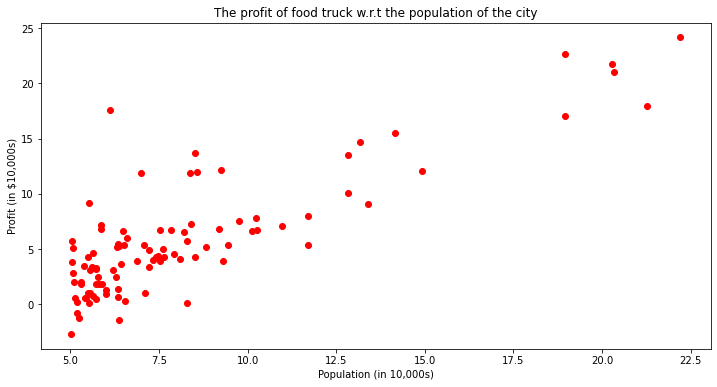

In [5]:
plotData(X, y)

#### Useful Functions

In [6]:
def computeCost(X, y, theta):
    if X.ndim == 1:
        X = X.reshape((1, -1))
    
    m = y.size
    J = np.sum((X@theta - y)**2) / (2*m)
    return J

In [7]:
def gradientDescent(X, y, theta, alpha, iters=100):
    m = y.size
    theta = theta.copy()
    
    J_history = []

    for a in range(iters):
        for i in range(m):
            x = X[i, :]
            J_history.append(computeCost(x, y[i], theta))
            theta = theta - (alpha/m) * ((np.sum(x*theta) - y[i])*x)
    
    return theta, J_history

In [8]:
def plotGradientDescent(J_history, step=100):
    J_history_count = len(J_history)
    
    plot_X = np.arange(step, J_history_count+1, step)
    plot_Y = []
    
    j = step
    while j <= J_history_count:
        start = 0 if j==step else j-step
        end = None if j==J_history_count else j
        
        avg_J = np.mean(J_history[start:end])
        plot_Y.append(avg_J)
        
        j += step
    
    plt.figure(figsize=(12, 6))
    plt.plot(plot_X, plot_Y, '-')
    plt.title("Cost during Gradient Descent")
    plt.xlabel("Iterations")
    plt.ylabel(f"Avg. cost after {step} iterations")

#### Train Model

In [9]:
# add col of 1s
X = np.concatenate((np.ones((m, 1)), X.reshape(-1, 1)), axis=1)

In [10]:
# gradient descent specs
alpha = 0.01
iters = 2000

# initialize theta
theta = np.zeros(2)

# run gradient descent
theta, J_history = gradientDescent(X, y, theta,alpha, iters)

#### Plot Best Fit

<Figure size 864x432 with 0 Axes>

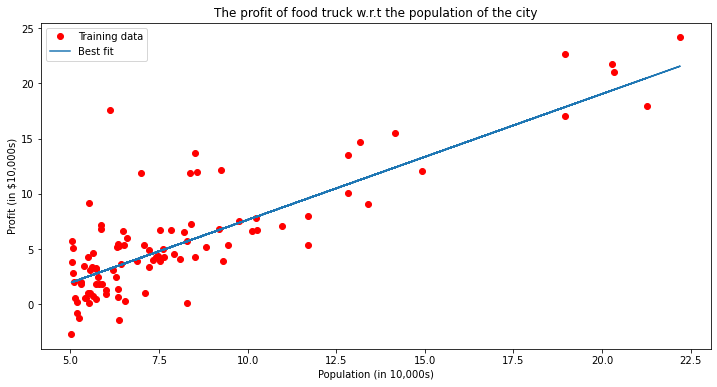

In [11]:
plt.figure(figsize=(12, 6))
plotData(X, y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Best fit'])

pass

#### Plot Cost Function against Iterations

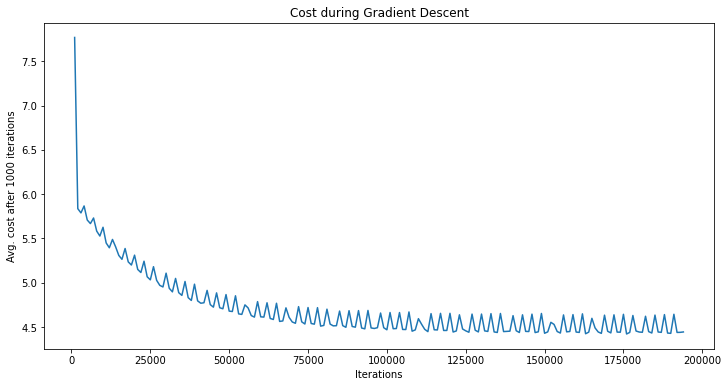

In [12]:
plotGradientDescent(J_history, step=1000) # increase step to make graph smoother